In [1]:
from sdgym import load_dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import xgboost as xgb

In [5]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.max_open_warning'] = 0
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]
markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
%matplotlib inline

In [6]:
dataset_name = 'gridr'
data, categorical_columns, ordinal_columns = load_dataset(dataset_name)

In [7]:
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [8]:
import logging 

In [9]:
import logging 
logging.basicConfig(level=logging.INFO)

In [10]:
clf = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [58]:
#kde = KDECopulaNNPdf(rho=0.2, clf=MLPClassifier(random_state=0, max_iter=1000))
#kde = KDECopulaNNPdf(rho=0.2, clf=clf)
kde = KDECopulaNNPdf(use_KDE=False, ordering='pca', n_uniform_bins=100, n_quantiles=2000)
#kde.max_scale_value = 500

In [59]:
kde = kde.fit(data)

INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.
Generating for node: 0: 100%|██████████| 2/2 [00:07<00:00,  3.94s/it]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 2.9515941251384055


In [65]:
df = pd.DataFrame(data, columns=['x', 'y'])

axs = sns.JointGrid(data=df, x='x', y='y', height=7)
axs.ax_joint.scatter(data=df, x='x', y='y', c=colors[0], marker='x', s=0.1)
cnt, bins, _ = axs.ax_marg_x.hist(df['x'], bins=50, color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(df['y'], bins=50, color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_data.png', dpi=300)

X_g = kde.pipe_[0].transform(data)
tdf = pd.DataFrame(X_g, columns=['x', 'y'])

axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
axs.ax_joint.scatter(data=tdf, x='x', y='y', c=colors[0], marker='x', s=0.1)
cnt, bins, _ = axs.ax_marg_x.hist(tdf['x'], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf['y'], bins='auto', color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_quantile.png', dpi=300)

X_p = kde.pipe_[0:2].transform(data)
tdf = pd.DataFrame(X_p, columns=['x', 'y'])

axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
axs.ax_joint.scatter(data=tdf, x='x', y='y', c=colors[0], marker='x', s=0.1)
cnt, bins, _ = axs.ax_marg_x.hist(tdf['x'], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf['y'], bins='auto', color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_pca.png', dpi=300)

X_u = kde.pipe_.transform(data)
tdf = pd.DataFrame(X_u, columns=['x', 'y'])

axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
axs.ax_joint.scatter(data=tdf, x='x', y='y', c=colors[0], marker='x', s=0.1)
cnt, bins, _ = axs.ax_marg_x.hist(tdf['x'], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf['y'], bins='auto', color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_uniform.png', dpi=300)

In [26]:
# clf=svm
kde.score(data)

-25724.816010733786

In [28]:
X_gen = kde.sample_no_weights(df.shape[0] * 10)
df_gen = pd.DataFrame(X_gen, columns=['x', 'y']).sample(n=df.shape[0])

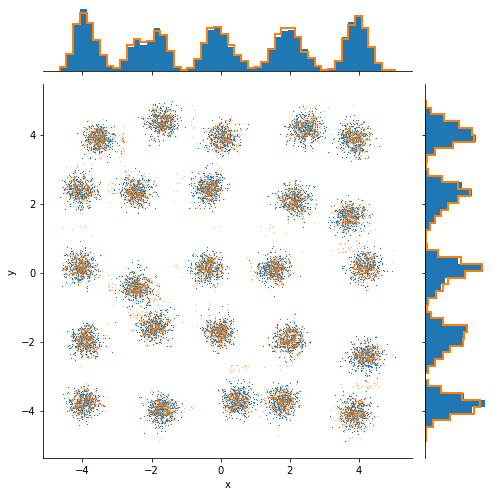

In [73]:
axs = sns.JointGrid(data=df_gen, x='x', y='y', height=7)
axs.ax_joint.scatter(data=df, x='x', y='y', c=colors[0], marker='x', s=0.1)
axs.ax_joint.scatter(data=df_gen, x='x', y='y', c=colors[1], marker='x', s=0.1, alpha=0.5)

cnt, bins, _ = axs.ax_marg_x.hist(df['x'], bins=50, color=colors[0])
cnt_gen, *_ = axs.ax_marg_x.hist(df_gen['x'], bins=bins, histtype='step', lw=2, color=colors[1])

cnt, bins, _ = axs.ax_marg_y.hist(df['y'], bins=50, color=colors[0], orientation='horizontal')
cnt_gen, *_ = axs.ax_marg_y.hist(df_gen['y'], bins=bins, histtype='step', lw=2, color=colors[1], orientation='horizontal')
axs.savefig('gridr_joint_marginal_with_sample.png', dpi=300)

In [83]:
X_g = kde.pipe_[0].transform(data)

In [85]:
X_g

array([[0.53421993, 0.83802676],
       [0.02678697, 0.70185202],
       [0.14206121, 0.29333761],
       ...,
       [0.37485487, 0.99684554],
       [0.85139173, 0.0419771 ],
       [0.21251729, 0.42339844]])

(array([201., 200., 199., 200., 199., 201., 199., 201., 200., 198., 200.,
        202., 200., 200., 199., 201., 199., 201., 200., 202., 199., 200.,
        200., 198., 201., 201., 198., 201., 198., 202., 199., 201., 199.,
        200., 201., 200., 201., 198., 201., 201., 199., 201., 199., 200.,
        199., 201., 200., 200., 200., 200.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

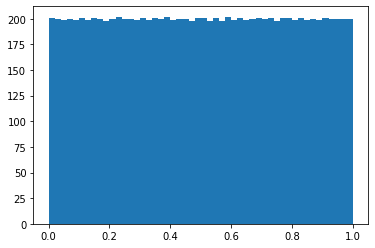

In [80]:
i=0
X_g = kde.pipe_[0].transform(data)
plt.hist(X_g[:, i], bins=50)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   9.,   9.,  43.,
         64., 112., 175., 264., 324., 351., 301., 454., 466., 568., 639.,
        665., 707., 656., 684., 500., 336., 544., 510., 350., 256., 193.,
        169., 160., 143., 113.,  78.,  65.,  43.,  21.,  12.,   7.,   3.,
          1.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.01743642, -3.85040736, -3.68337829, -3.51634923, -3.34932016,
        -3.1822911 , -3.01526203, -2.84823297, -2.6812039 , -2.51417484,
        -2.34714577, -2.18011671, -2.01308764, -1.84605858, -1.67902951,
        -1.51200045, -1.34497138, -1.17794231, -1.01091325, -0.84388418,
        -0.67685512, -0.50982605, -0.34279699, -0.17576792, -0.00873886,
         0.15829021,  0.32531927,  0.49234834,  0.6593774 ,  0.82640647,
         0.99343553,  1.1604646 ,  1.32749366,  1.49452273,  1.66155179,
         1.82858086,  1.99560992,  2.16263899,  2.32966805,  2.49669712,
         2.66372618,  2.83075525,  2.99778431,  3.16481338,  3.33184244,
 

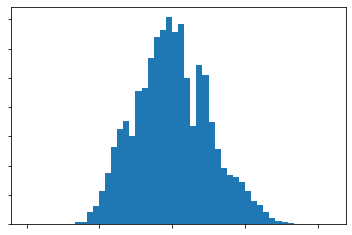

In [24]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 0], bins=50)

(array([  1.,   0.,   4.,   4.,   8.,   9.,  26.,  38.,  43.,  67.,  84.,
        122., 162., 187., 231., 289., 267., 253., 274., 619., 710., 466.,
        458., 610., 622., 511., 430., 352., 223., 383., 555., 417., 271.,
        222., 261., 266., 191., 165.,  77.,  51.,  36.,  18.,  10.,   5.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([-3.33564267, -3.19906838, -3.06249409, -2.92591981, -2.78934552,
        -2.65277123, -2.51619694, -2.37962265, -2.24304836, -2.10647408,
        -1.96989979, -1.8333255 , -1.69675121, -1.56017692, -1.42360263,
        -1.28702835, -1.15045406, -1.01387977, -0.87730548, -0.74073119,
        -0.6041569 , -0.46758262, -0.33100833, -0.19443404, -0.05785975,
         0.07871454,  0.21528883,  0.35186311,  0.4884374 ,  0.62501169,
         0.76158598,  0.89816027,  1.03473456,  1.17130884,  1.30788313,
         1.44445742,  1.58103171,  1.717606  ,  1.85418029,  1.99075457,
         2.12732886,  2.26390315,  2.40047744,  2.53705173,  2.67362602,
 

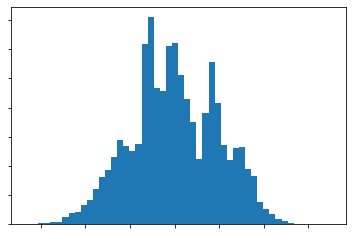

In [25]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 1], bins=50)

(array([200., 199., 201., 200., 201., 200., 199., 202., 198., 199., 201.,
        200., 200., 200., 197., 204., 197., 203., 200., 199., 200., 200.,
        200., 198., 205., 197., 201., 201., 200., 197., 199., 200., 201.,
        204., 197., 199., 201., 202., 201., 198., 199., 202., 198., 202.,
        199., 201., 200., 200., 199., 199.]),
 array([6.73790207e-06, 2.00066030e-02, 4.00064680e-02, 6.00063331e-02,
        8.00061981e-02, 1.00006063e-01, 1.20005928e-01, 1.40005793e-01,
        1.60005658e-01, 1.80005523e-01, 2.00005388e-01, 2.20005253e-01,
        2.40005119e-01, 2.60004984e-01, 2.80004849e-01, 3.00004714e-01,
        3.20004579e-01, 3.40004444e-01, 3.60004309e-01, 3.80004174e-01,
        4.00004039e-01, 4.20003904e-01, 4.40003769e-01, 4.60003634e-01,
        4.80003499e-01, 5.00003364e-01, 5.20003229e-01, 5.40003094e-01,
        5.60002959e-01, 5.80002824e-01, 6.00002689e-01, 6.20002555e-01,
        6.40002420e-01, 6.60002285e-01, 6.80002150e-01, 7.00002015e-01,
        7.

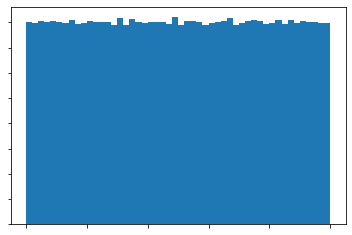

In [26]:
X_u = kde.pipe_.transform(data)
plt.hist(X_u[:, 1], bins=50)

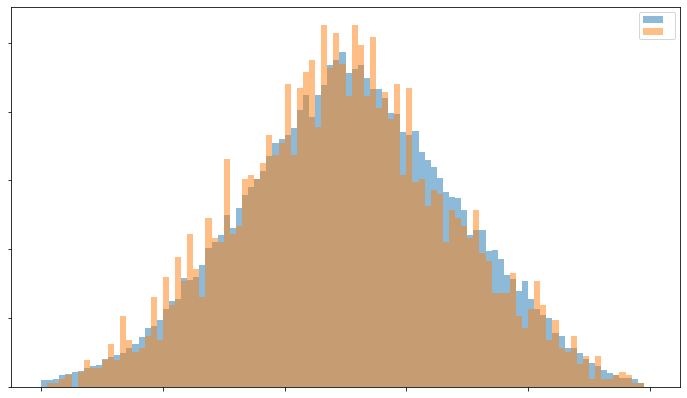

INFO:KDECopulaNNPdf:Maximum weight found: 2.0871983846746502


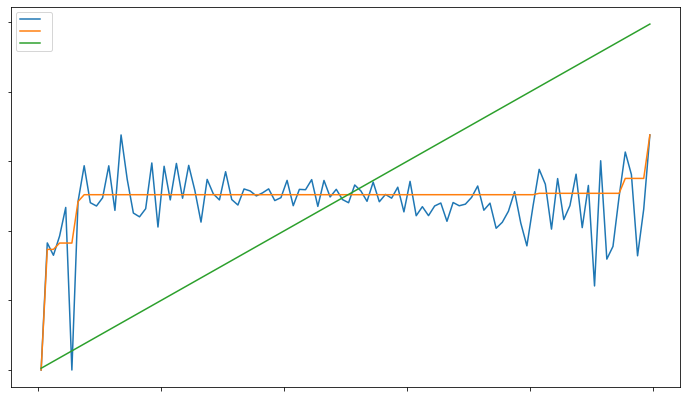

In [27]:
kde._calibrate_classifier(kde.hist_p0_, kde.hist_p1_, kde.bin_edges_, validation_plots=True)

In [28]:
X_gen, sample_weight = kde.sample(data.shape[0])

In [29]:
sum(sample_weight)

10156.940948188305

(array([9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.300e+01, 2.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00,
        9.914e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.400e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.04174397, 0.08348794, 0.1252319 , 0.16697589,
        0.20871985, 0.2504638 , 0.29220778, 0.33395177, 0.37569574,
        0.4174397 , 0.45918366, 0.5009276 , 0.5426716 , 0.58441556,
        0.62615955, 0.66790354, 0.7096475 , 0.7513915 , 0.7931354 ,
        0.8348794 , 0.8766234 , 0.9183673 , 0.9601113 , 1.0018553 ,
        1.0435992 , 1.0853432 , 1.12

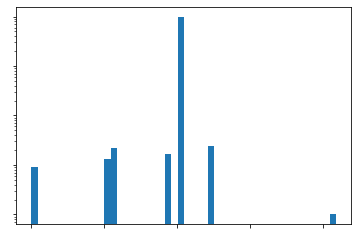

In [30]:
plt.hist(sample_weight, bins=50, log=True)

(array([0.       , 0.       , 0.       , 0.0010001, 0.0220022, 0.0420042,
        0.0950095, 0.1480148, 0.230023 , 0.3010301, 0.2590259, 0.2650265,
        0.2060206, 0.1430143, 0.1420142, 0.0860086, 0.0540054, 0.030003 ,
        0.0160016, 0.0150015, 0.0090009, 0.0350035, 0.0670067, 0.10001  ,
        0.1360136, 0.1390139, 0.1470147, 0.1220122, 0.1090109, 0.130013 ,
        0.1630163, 0.2030203, 0.2120212, 0.1560156, 0.1230123, 0.0860086,
        0.0450045, 0.0190019, 0.0070007, 0.0010001, 0.0050005, 0.0230023,
        0.0290029, 0.060006 , 0.1120112, 0.1480148, 0.1810181, 0.1910191,
        0.1980198, 0.1940194, 0.1730173, 0.1560156, 0.1220122, 0.0940094,
        0.0820082, 0.0640064, 0.0510051, 0.0460046, 0.0150015, 0.0090009,
        0.0170017, 0.0220022, 0.0380038, 0.0550055, 0.0910091, 0.1420142,
        0.1470147, 0.1860186, 0.1830183, 0.1970197, 0.1720172, 0.1840184,
        0.1480148, 0.1190119, 0.1040104, 0.0680068, 0.0540054, 0.0320032,
        0.0120012, 0.0060006, 0.004000

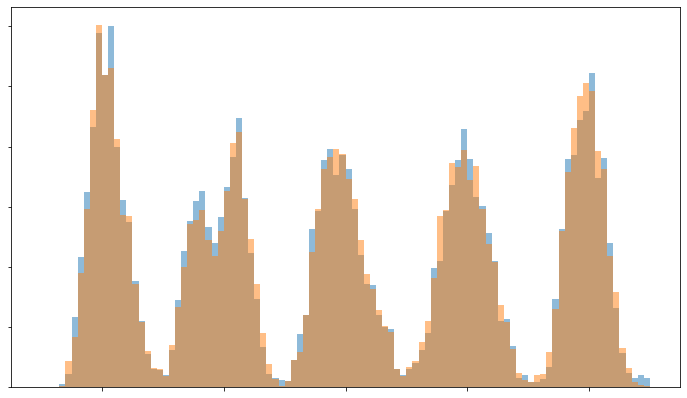

In [31]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

(array([0.   , 0.001, 0.   , 0.007, 0.011, 0.035, 0.046, 0.097, 0.151,
        0.22 , 0.259, 0.323, 0.303, 0.251, 0.156, 0.11 , 0.046, 0.02 ,
        0.012, 0.003, 0.007, 0.014, 0.018, 0.045, 0.073, 0.088, 0.1  ,
        0.107, 0.159, 0.185, 0.189, 0.224, 0.201, 0.244, 0.154, 0.099,
        0.054, 0.033, 0.011, 0.01 , 0.011, 0.011, 0.019, 0.043, 0.081,
        0.086, 0.082, 0.086, 0.16 , 0.201, 0.28 , 0.298, 0.241, 0.165,
        0.107, 0.069, 0.014, 0.012, 0.001, 0.002, 0.004, 0.009, 0.019,
        0.03 , 0.058, 0.047, 0.081, 0.081, 0.113, 0.119, 0.119, 0.184,
        0.254, 0.225, 0.231, 0.171, 0.119, 0.059, 0.026, 0.01 , 0.004,
        0.002, 0.003, 0.017, 0.02 , 0.077, 0.132, 0.171, 0.241, 0.272,
        0.261, 0.208, 0.201, 0.146, 0.095, 0.091, 0.027, 0.026, 0.009,
        0.003]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

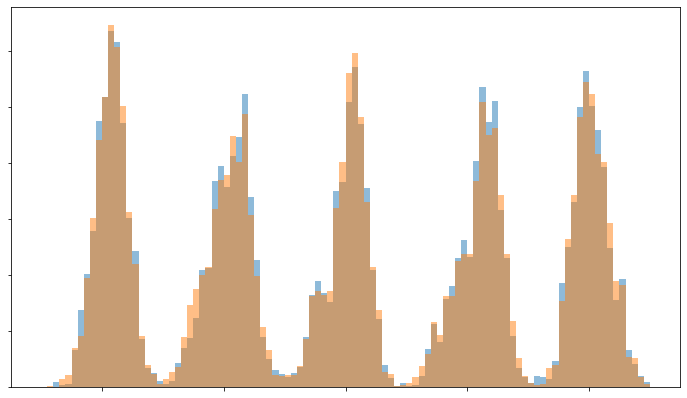

In [32]:
i=1
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

In [33]:
X_gen, sample_weight = kde.sample(data.shape[0])

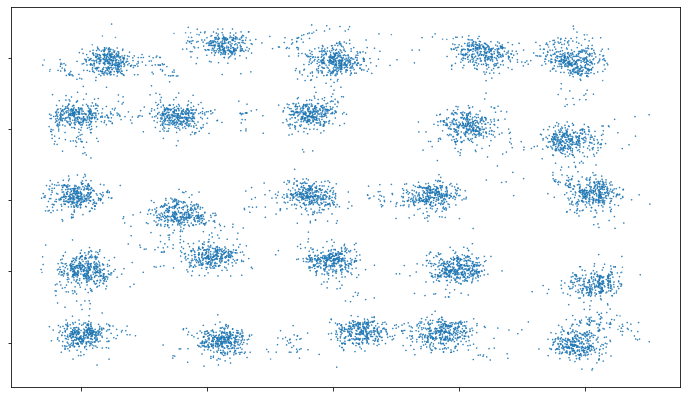

In [34]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.3*sample_weight)

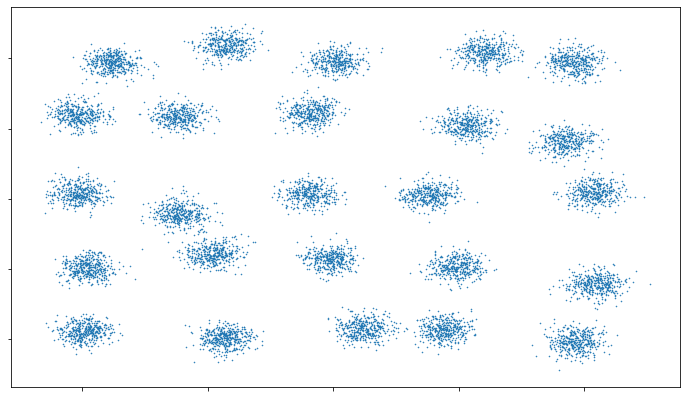

In [35]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(data[:,i], data[:,j], s=0.3)

In [ ]:
X_gen = kde.sample_no_weights(200000)

In [ ]:
len (X_gen)

In [ ]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

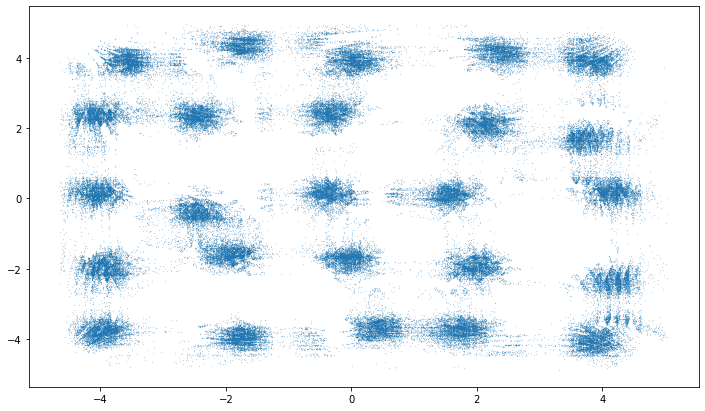

In [58]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.01)

10000

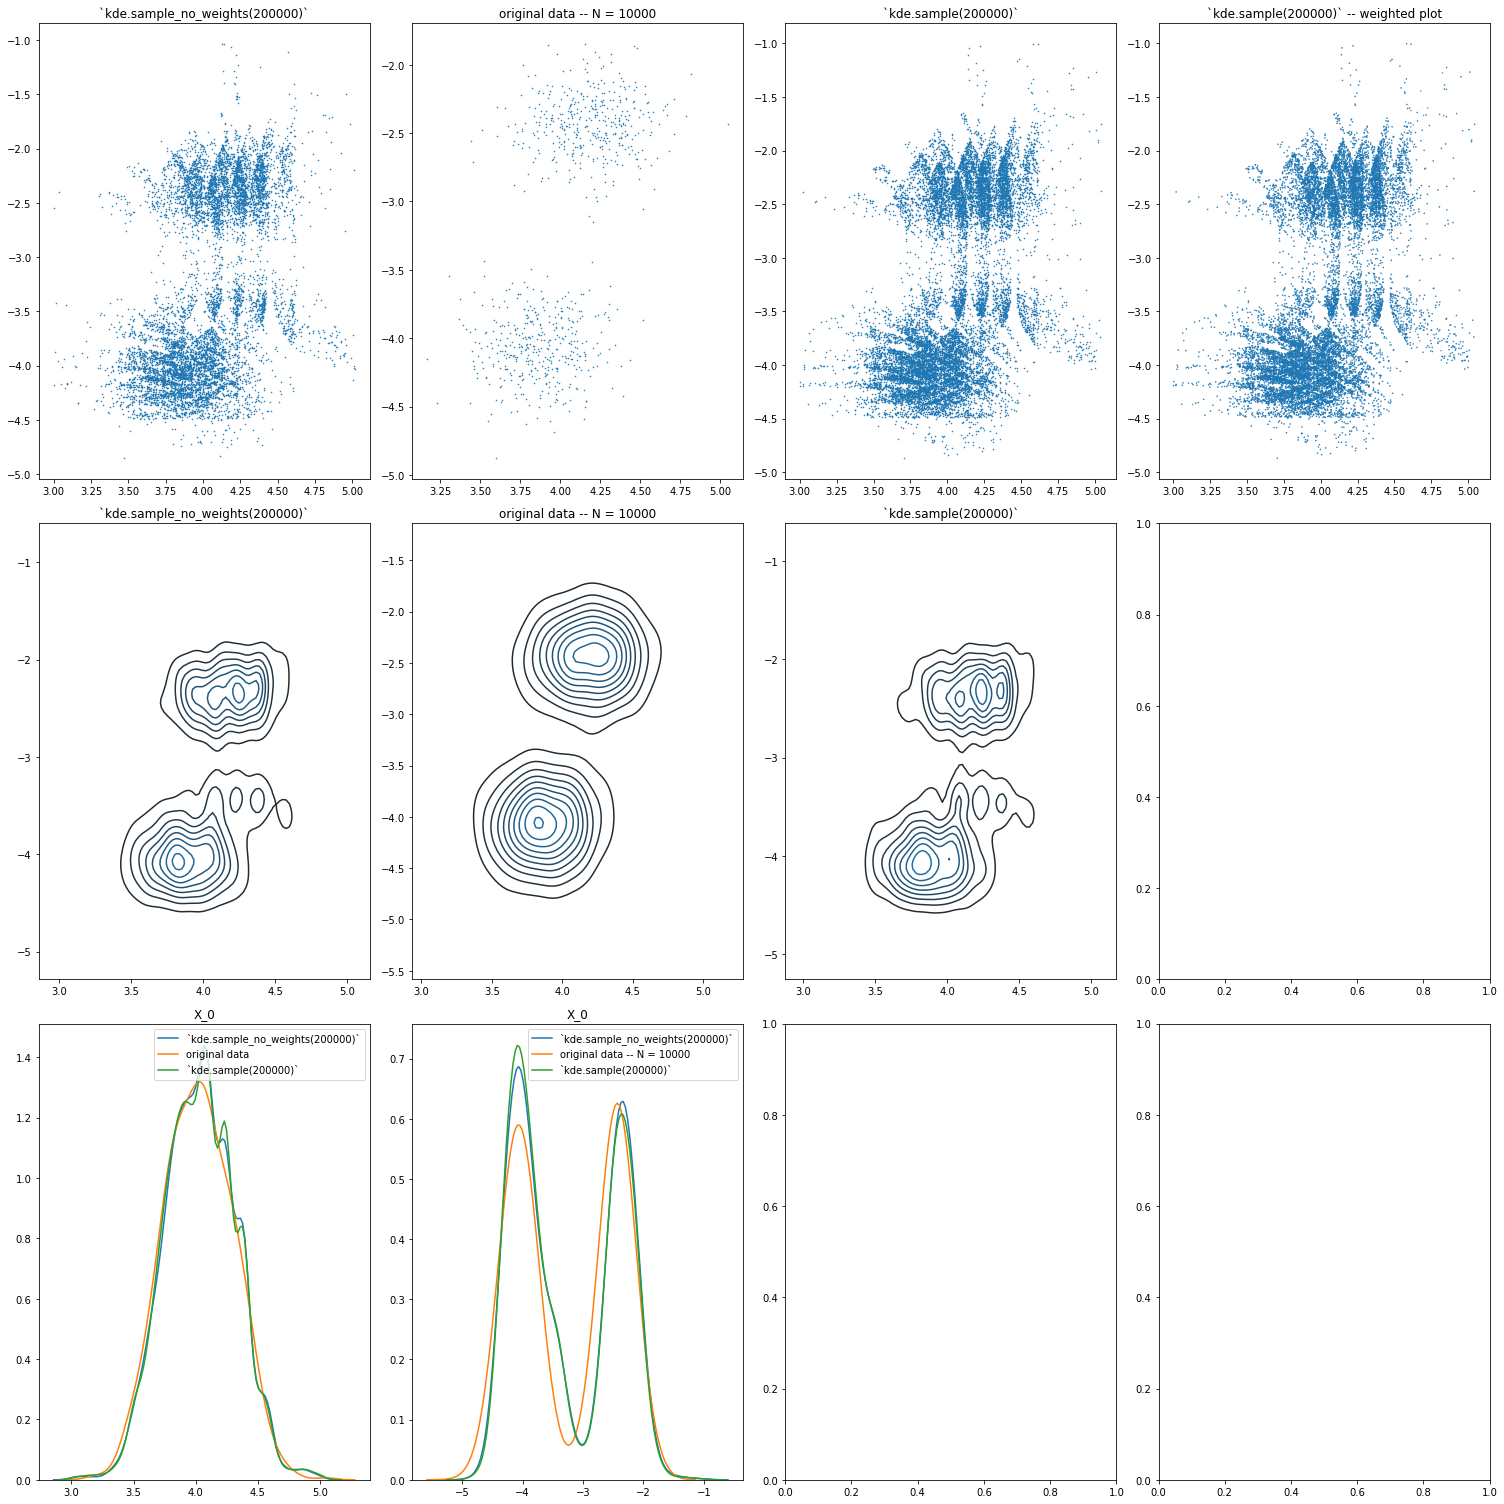

In [144]:
N = 200000

X_gen_w, sample_weight = kde.sample(N)
X_gen = kde.sample_no_weights(N)

Xg_ss = X_gen[(X_gen[:, i] > 3) & (X_gen[:, j] < -1), :]
Xgw_idx = (X_gen_w[:, i] > 3) & (X_gen_w[:, j] < -1)
Xgw_ss = X_gen_w[Xgw_idx, :]
data_ss = data[(data[:, i] > 3) & (data[:, j] < -1), :]

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(21, 21))
ax[0, 0].scatter(Xg_ss[:,i], Xg_ss[:,j], s=0.3)
ax[0, 0].set_title(f'`kde.sample_no_weights({N})`')
ax[0, 1].scatter(data_ss[:,i], data_ss[:,j], s=0.3)
ax[0, 1].set_title(f'original data -- N = {data.shape[0]}')
ax[0, 2].scatter(Xgw_ss[:,i], Xgw_ss[:,j], s=0.3)
ax[0, 2].set_title(f'`kde.sample({N})`')
ax[0, 3].scatter(Xgw_ss[:,i], Xgw_ss[:,j], s=0.3*sample_weight[Xgw_idx])
ax[0, 3].set_title(f'`kde.sample({N})` -- weighted plot')

sns.kdeplot(Xg_ss[:,i], Xg_ss[:,j], ax=ax[1, 0])
ax[1, 0].set_title(f'`kde.sample_no_weights({N})`')
sns.kdeplot(data_ss[:,i], data_ss[:,j], ax=ax[1, 1])
ax[1, 1].set_title(f'original data -- N = {data.shape[0]}')
sns.kdeplot(Xgw_ss[:,i], Xgw_ss[:,j], ax=ax[1, 2])
ax[1, 2].set_title(f'`kde.sample({N})`')

sns.kdeplot(Xg_ss[:,i], ax=ax[2, 0], label=f'`kde.sample_no_weights({N})`')
sns.kdeplot(data_ss[:,i], ax=ax[2, 0], label='original data')
sns.kdeplot(Xgw_ss[:,i], ax=ax[2, 0], label=f'`kde.sample({N})`')

sns.kdeplot(Xg_ss[:,j], ax=ax[2, 1], label=f'`kde.sample_no_weights({N})`')
sns.kdeplot(data_ss[:,j], ax=ax[2, 1], label=f'original data -- N = {data.shape[0]}')
sns.kdeplot(Xgw_ss[:,j], ax=ax[2, 1], label=f'`kde.sample({N})`')
ax[2, 0].set_title('X_0')
ax[2, 1].set_title('X_1')

plt.tight_layout()
fig.savefig(f'gridr_region_highlight_N_sample_{N}.png')

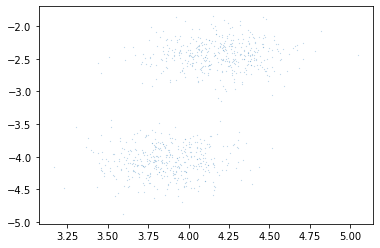

In [60]:
plt.scatter(data_ss[:,i], data_ss[:,j], s=0.01)

In [ ]:
sns.kdeplot(Xg_ss[:,i], Xg_ss[:,j])

sns.kdeplot(Xg_ss[:, i])
sns.kdeplot(Xg_ss[:, j])
sns.kdeplot(data_ss[:, i])
sns.kdeplot(data_ss[:, j])

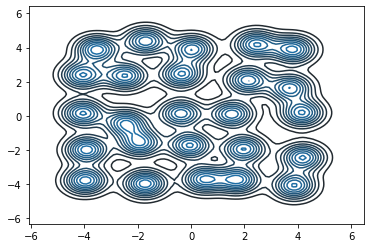

In [153]:
sns.kdeplot(data[:, 0], data[:, 1])

In [157]:
lidx = np.random.choice(np.arange(0, X_gen_w.shape[0], 1), size=data.shape[0], replace=False)

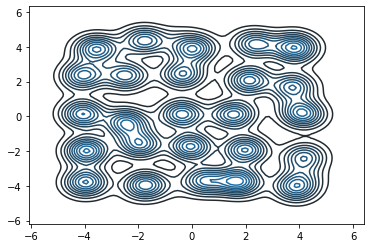

In [158]:
sns.kdeplot(X_gen_w[lidx, 0], X_gen_w[lidx, 1])

## run sdgym

In [36]:
import sdgym

In [37]:
def KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns):
    # assert len(categorical_columns + ordinal_columns) <= 1

    all_features = list(range(real_data.shape[1]))
    numerical_features = list(set(all_features) - set(categorical_columns + ordinal_columns))
    data = np.float64(real_data)
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )
#     clf = MLPClassifier(alpha=0.1, random_state=0, max_iter=1000, early_stopping=True)
    
    kde = KDECopulaNNPdf(
        use_KDE=False, 
        distinct_threshold=-1,
        n_uniform_bins=50,
    )
    kde = kde.fit(data)
    
    X_gen = kde.sample_no_weights(n_samples, show_progress=True)    
    X_gen = np.float32(X_gen)
    
    print(X_gen[:, :5])

    return X_gen

In [38]:
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer, CopulaGAN)

all_synthesizers = [
#    IdentitySynthesizer,
#     IndependentSynthesizer,
     KDECopulaNNPdf_Synthesizer,
#    CopulaGAN
#     KDECopulaNNPdf_SynthesizerInteger,
]

In [39]:
scores = sdgym.run(synthesizers=all_synthesizers, datasets=[dataset_name], iterations=1)

INFO:sdgym.benchmark:0%|          | 0/1 [00:00<?, ?it/s]
INFO:sdgym.benchmark:Evaluating KDECopulaNNPdf_Synthesizer on dataset gridr; iteration 0; 338.25 MB
INFO:sdgym.data:Loading dataset gridr
INFO:sdgym.benchmark:Running KDECopulaNNPdf_Synthesizer on dataset gridr; iteration 0; 338.74 MB
INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.

Generating for node: 0: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 2.0871983846746502
INFO:KDECopulaNNPdf:Generating 13034 data points.

Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]
INFO:sdgym.benchmark:Scoring KDECopulaNNPdf_Synthesizer on d

[[-2.4392884 -0.3050306]
 [-2.6843486  2.3664837]
 [-0.8663006 -3.795085 ]
 ...
 [-0.5705567  0.2966548]
 [-2.523461  -0.6442784]
 [ 2.258403  -1.8472168]]


INFO:sdgym.benchmark:Finished KDECopulaNNPdf_Synthesizer on dataset gridr; iteration 0; 351.83 MB
INFO:sdgym.benchmark:100%|##########| 1/1 [00:07<00:00,  7.45s/it]


In [40]:
scores

,gridr/syn_likelihood,gridr/test_likelihood,timestamp
VEEGANSynthesizer,-11.458546,-8.908475,2020-04-12 09:41:35.096775
CLBNSynthesizer,-4.008392,-7.432801,2020-10-17 09:46:54.494331
CTGAN,-8.309750,-5.048310,2020-10-17 09:46:54.494331
CTGANSynthesizer,-8.323578,-5.027293,2020-10-17 09:46:54.494331
CopulaGAN,-8.162767,-5.005470,2020-10-17 09:46:54.494331
GaussianCopulaCategorical,-7.164374,-4.543400,2020-10-17 09:46:54.494331
GaussianCopulaCategoricalFuzzy,-7.144525,-4.554080,2020-10-17 09:46:54.494331
GaussianCopulaOneHot,-7.192246,-4.550715,2020-10-17 09:46:54.494331
IdentitySynthesizer,-3.592651,-3.641025,2020-10-17 09:46:54.494331
IndependentSynthesizer,-5.117874,-4.028996,2020-10-17 09:46:54.494331
